# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Set base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
cities_json = []
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# start retriving data from the openweather website
print('Beginning Data Retrieval')
print('-----------------------------')
for i, city in enumerate(cities):
    try:
        # get the response in json for each city
        response = requests.get(query_url + city).json()
        cities_json.append(response)
        
        # Add data from each response to lists
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {i+1} of {len(cities)} | {city}")
    except:
        # if the information of a city is not found, skip to next city
        print(f"The information for {city} not found. Skipping....")
    # wait for 1 second before the next request
    time.sleep(1)
print('-----------------------------')
print(f'Data Retrieval Complete. Infromation for {len(city_name)} cities found.')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 652 | hithadhoo
Processing Record 2 of 652 | busselton
Processing Record 3 of 652 | kodiak
Processing Record 4 of 652 | sitka
Processing Record 5 of 652 | new norfolk
Processing Record 6 of 652 | araci
Processing Record 7 of 652 | szydlowiec
Processing Record 8 of 652 | denpasar
Processing Record 9 of 652 | saint george
Processing Record 10 of 652 | port macquarie
Processing Record 11 of 652 | krasnoselkup
Processing Record 12 of 652 | carnarvon
Processing Record 13 of 652 | nanortalik
Processing Record 14 of 652 | chanute
Processing Record 15 of 652 | cherskiy
Processing Record 16 of 652 | tiksi
Processing Record 17 of 652 | grenville
Processing Record 18 of 652 | vaini
Processing Record 19 of 652 | alihe
Processing Record 20 of 652 | sao jose da coroa grande
Processing Record 21 of 652 | albany
Processing Record 22 of 652 | mataura
Processing Record 23 of 652 | ostrovnoy
The information for tumannyy not fou

Processing Record 199 of 652 | zarechnyy
Processing Record 200 of 652 | chernyshevskiy
Processing Record 201 of 652 | marsh harbour
Processing Record 202 of 652 | sola
Processing Record 203 of 652 | hastings
Processing Record 204 of 652 | korla
Processing Record 205 of 652 | port keats
Processing Record 206 of 652 | aras
The information for bajo baudo not found. Skipping....
Processing Record 208 of 652 | saint-francois
Processing Record 209 of 652 | fortuna
Processing Record 210 of 652 | balikpapan
Processing Record 211 of 652 | honiara
Processing Record 212 of 652 | cheney
Processing Record 213 of 652 | ilulissat
Processing Record 214 of 652 | callaway
Processing Record 215 of 652 | yellowknife
Processing Record 216 of 652 | umarizal
Processing Record 217 of 652 | karratha
Processing Record 218 of 652 | donskoye
Processing Record 219 of 652 | codrington
Processing Record 220 of 652 | faya
Processing Record 221 of 652 | arkadak
The information for dzhusaly not found. Skipping....
The 

Processing Record 397 of 652 | peskovka
Processing Record 398 of 652 | isangel
Processing Record 399 of 652 | brigantine
Processing Record 400 of 652 | botwood
Processing Record 401 of 652 | clyde river
Processing Record 402 of 652 | asau
Processing Record 403 of 652 | gombe
Processing Record 404 of 652 | pokhara
Processing Record 405 of 652 | saldanha
Processing Record 406 of 652 | kotaparh
Processing Record 407 of 652 | manoel urbano
Processing Record 408 of 652 | bharatpur
Processing Record 409 of 652 | bushehr
Processing Record 410 of 652 | cabedelo
Processing Record 411 of 652 | baykit
Processing Record 412 of 652 | nouadhibou
Processing Record 413 of 652 | lorengau
Processing Record 414 of 652 | patrocinio
The information for ngukurr not found. Skipping....
Processing Record 416 of 652 | kaeo
Processing Record 417 of 652 | vostok
Processing Record 418 of 652 | llandrindod wells
Processing Record 419 of 652 | muroto
Processing Record 420 of 652 | san antonio
Processing Record 421 

Processing Record 598 of 652 | totness
Processing Record 599 of 652 | danane
Processing Record 600 of 652 | miri
The information for mentok not found. Skipping....
The information for kytlym not found. Skipping....
Processing Record 603 of 652 | ankang
Processing Record 604 of 652 | camacha
Processing Record 605 of 652 | trujillo alto
Processing Record 606 of 652 | la rioja
Processing Record 607 of 652 | vestmannaeyjar
Processing Record 608 of 652 | gazli
Processing Record 609 of 652 | phalombe
Processing Record 610 of 652 | kijini
Processing Record 611 of 652 | kokopo
Processing Record 612 of 652 | alta floresta
Processing Record 613 of 652 | el real de santa maria
Processing Record 614 of 652 | letlhakeng
Processing Record 615 of 652 | tessalit
Processing Record 616 of 652 | fuzhou
Processing Record 617 of 652 | dergachi
Processing Record 618 of 652 | los llanos de aridane
Processing Record 619 of 652 | coahuayana
The information for lolua not found. Skipping....
Processing Record 62

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert data into a DataFrame   
cities_df = pd.DataFrame({"City": city_name,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})   
# Save the organized dataframe to a .csv file

# cities_df.index.name='City ID'
cities_df.to_csv(output_data_file, index = False, header=True)

# Display the first 5 rows in the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.34,67,100,7.90,MV,1633797558
1,Busselton,-33.6500,115.3333,46.09,80,16,8.14,AU,1633797559
2,Saint Paul Harbor,57.7900,-152.4072,49.51,46,90,9.22,US,1633797560
3,Sitka,57.0531,-135.3300,48.09,76,90,17.27,US,1633797562
4,New Norfolk,-42.7826,147.0587,47.70,62,44,3.00,AU,1633797563


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# check if there is any city with higher than 100 humidity
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,6.010000e+02
mean,21.637873,16.120122,64.562679,69.502496,59.317804,7.778918,1.633798e+09
std,32.710351,88.494985,19.789511,21.505900,37.510894,5.469706,2.558456e+02
min,-54.800000,-179.166700,0.030000,6.000000,0.000000,0.000000,1.633797e+09
25%,-4.940800,-59.516700,49.480000,58.000000,20.000000,3.620000,1.633798e+09
50%,26.933300,22.201400,68.700000,74.000000,75.000000,6.460000,1.633798e+09
75%,48.932900,85.833300,79.560000,85.000000,96.000000,10.540000,1.633798e+09
max,78.218600,179.316700,111.130000,100.000000,100.000000,29.930000,1.633798e+09


There are no cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

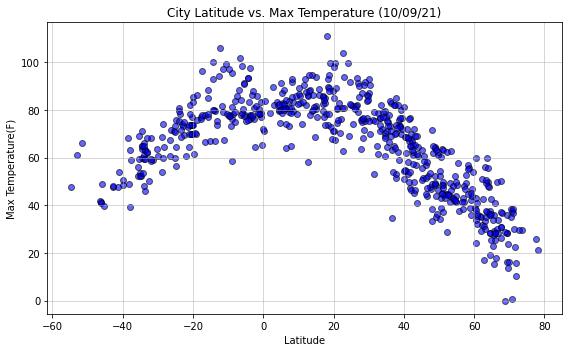

In [20]:
# get the latitude and temperature data from the dataframe
Latitude = cities_df['Lat']
Temperature = cities_df['Max Temp']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Temperature, facecolor='blue', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Max Temperature (10/09/21)')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature(F)')
plt.tight_layout()
plt.savefig('./PNG_images/City_Latitude_vs_Max_Temperature.png', dpi=300)
plt.show()

## Notes:
* This graph is showing the relationship between the temperature and latitude of the cities. 
* It is likely that there is a corrlation between the temperature and latitude. The temperature of the cities is higher when the citie's latitude is closer to 0. 

## Latitude vs. Humidity Plot

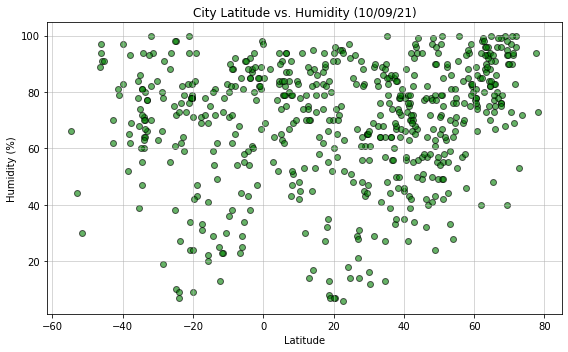

In [21]:
# get the latitude and humidity data from the dataframe
Latitude = cities_df['Lat']
Humidity = cities_df['Humidity']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Humidity, facecolor='green', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Humidity (10/09/21)')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('./PNG_images/City_Latitude_vs_Humidity.png', dpi=300)
plt.show()

## Notes:
* This graph is showing the relationship between the humidity and latitude of the cities. 
* There does not seem to be a strong correlation between the humidity and latitude of the cities.

## Latitude vs. Cloudiness Plot

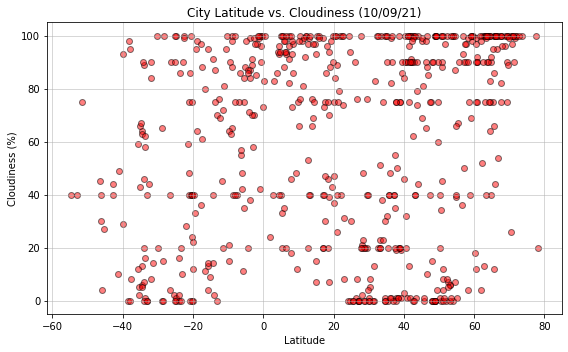

In [22]:
# get the latitude and Cloudiness data from the dataframe
Latitude = cities_df['Lat']
Cloudiness = cities_df['Cloudiness']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Cloudiness, facecolor='r', edgecolor='black',alpha=0.5)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Cloudiness (10/09/21)')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('./PNG_images/City_Latitude_vs_Cloudiness.png', dpi=300)
plt.show()

## Notes:
* This graph is showing the relationship between the cloudiness and latitude of the cities. 
* There does not seem to be a strong correlation between the cloudiness and latitude of the cities.

## Latitude vs. Wind Speed Plot

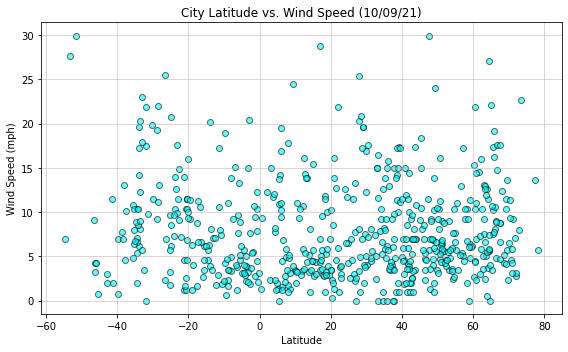

In [23]:
# get the latitude and Wind Speed data from the dataframe
Latitude = cities_df['Lat']
Wind_speed = cities_df['Wind Speed']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Wind_speed, facecolor='cyan', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Wind Speed (10/09/21)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('./PNG_images/City_Latitude_vs_Wind_Speed.png', dpi=300)
plt.show()

## Notes:
* This scatter graph is showing the relationship between the wind speed and latitude of the cities. 

## Linear Regression

In [24]:
# genrate the dataframe for Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude)
northern_df = cities_df.loc[cities_df['Lat']>=0, :]
southern_df = cities_df.loc[cities_df['Lat']<0, :]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saint Paul Harbor,57.7900,-152.4072,49.51,46,90,9.22,US,1633797560
3,Sitka,57.0531,-135.3300,48.09,76,90,17.27,US,1633797562
6,Szydłowiec,51.2282,20.8611,48.52,55,8,6.40,PL,1633797566
8,Saint George,37.1041,-113.5841,64.87,85,40,4.00,US,1633797568
10,Krasnosel'kup,65.7000,82.4667,27.39,77,100,17.36,RU,1633797314


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.748


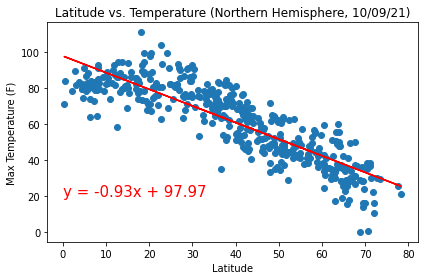

In [25]:
# extract latitude and temperature from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Temperagtue vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature (Northern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Temperature_(Northern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the max temperature and latitude of the cities on Northern Hemisphere. 
* There is a moderate correlation between the temperature and latitude with an r-squared of 0.748. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.58


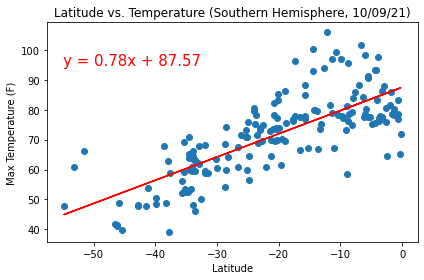

In [26]:
# extract latitude and temperature from the sourthern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of temperature vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature (Southern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Temperature_(Southern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the max temperature and latitude of the cities on Southern Hemisphere. 
* There is a moderate correlation between the temperature and latitude with an r-squared of 0.58. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.053


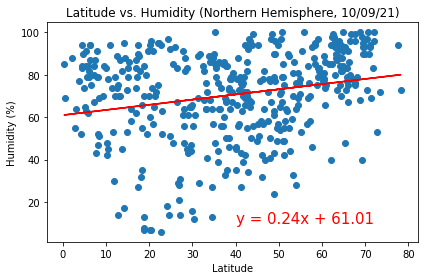

In [27]:
# extract latitude and humidity from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of humidity vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Northern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Humidity_(Northern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the humidity and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the humidity and latitude with an r-squared of 0.053. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005


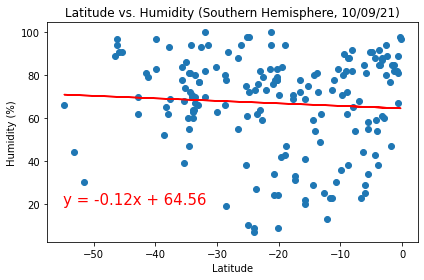

In [31]:
# extract latitude and humidity from the southern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of humidity vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Southern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Humidity_(Southern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the humidity and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the humidity and latitude with an r-squared of 0.005. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013


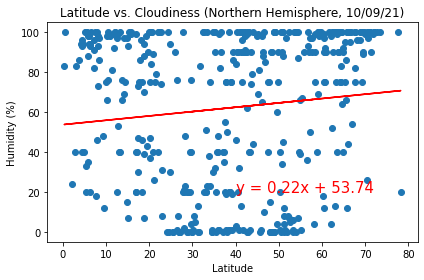

In [32]:
# extract latitude and Cloudiness from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Cloudiness vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Cloudiness (Northern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Cloudiness_(Northern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Cloudiness and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the cloudiness and latitude with an r-squared of 0.013. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.149


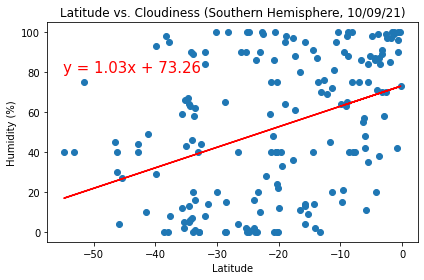

In [33]:
# extract latitude and Cloudiness from the southeren hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Cloudiness vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Cloudiness (Southern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Cloudiness_(Southern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Cloudiness and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the cloudiness and latitude with an r-squared of 0.149. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007


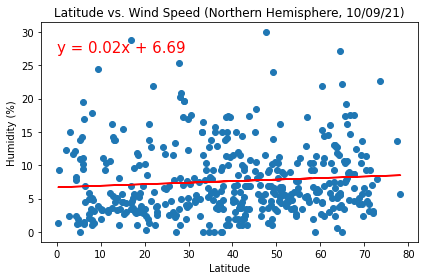

In [36]:
# extract latitude and Wind Speed from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Wind Speed vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Wind_Speed_(Northern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Wind Speed and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the Wind Speed and latitude with an r-squared of 0.007. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.066


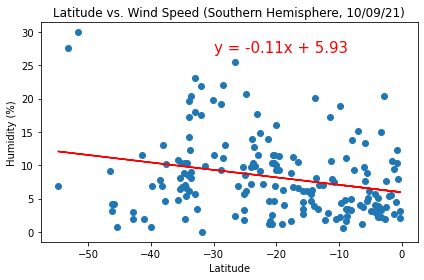

In [39]:
# extract latitude and Wind Speed from the southern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Wind Speed vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,27),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere, 10/09/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.tight_layout()
plt.savefig('./PNG_images/Latitude_vs_Wind_Speed_(Southern_Hemisphere).png', dpi=300)
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Wind Speed and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the Wind Speed and latitude with an r-squared of 0.066. 